# Asia Pacific Bids Histogram
 Histograma aproximado con Presto

In [22]:
from stats_util import get_cloudwatch_eff_histogram
%matplotlib inline
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.ticker import FuncFormatter
import numpy as np
import math
from datetime import datetime

time, eff = get_cloudwatch_eff_histogram(datetime(2018, 12, 13),datetime(2018, 12, 18),'ap-southeast-1')
time, eff_silver = get_cloudwatch_eff_histogram(datetime(2018, 12, 20),datetime(2018, 12, 25),'ap-southeast-1')
"done"

'done'

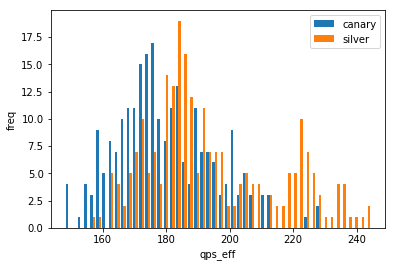

In [23]:
def millions(x, pos):
    'The two args are the value and tick position'
    return '$%1.1fM' % (x * 1e-6)
eff = np.array(eff)
eff_silver = np.array(eff_silver)
plt.hist([freq, freq_silver], bins=50, label=['canary', 'silver'])


plt.xlabel('qps_eff')
plt.ylabel('freq')
plt.legend()
plt.show()

In [24]:
(eff.mean(),math.sqrt(eff.var()), eff_silver.mean(),math.sqrt(eff_silver.var()))

(179.6929410410242, 15.256508966985775, 194.17695273179433, 20.501476716939585)

  ### Chi Square Test
Determine whether there is a significant difference between the expected frequencies and the observed frequencies in one or more categories.

H0: Both distribution frequencies of Non-Silver and Silver are equals
H1: Samples form Silver and Non-Silver belongs to two diferent distributions

PD: try  Kolmogorov–Smirnov test 


In [25]:
from scipy import stats


dice = np.array([eff,eff_silver])
stats.chi2_contingency(dice)
chi2_stat, p_val, dof, ex = stats.chi2_contingency(dice)
chi2_stat, p_val, dof, ex

(129.0614892287499,
 0.9999999993904861,
 239,
 array([[169.44682709, 166.85226346, 161.95701568, 155.40214329,
         154.02748539, 154.60023567, 150.82643497, 154.37765839,
         162.58755595, 164.54440507, 166.9873195 , 168.39716635,
         169.58214721, 166.1613804 , 167.45564728, 170.49648783,
         167.0030544 , 167.30745315, 168.25555227, 170.65526725,
         171.05865282, 168.35482517, 173.20117374, 171.20913566,
         172.85414771, 166.61025413, 167.71649448, 170.48328372,
         166.51641692, 171.06717827, 172.17644676, 169.04944939,
         172.46455164, 167.37690127, 166.50691876, 172.90306894,
         182.29079514, 176.24315864, 182.43269531, 181.26316326,
         189.10171723, 196.47165733, 195.27323028, 195.98530594,
         203.30718308, 194.38864293, 201.37694024, 202.3630892 ,
         194.84238017, 175.07362659, 163.00724859, 163.71589117,
         163.59029808, 158.44613081, 161.45104285, 163.84148427,
         171.58906192, 166.71095747, 171.31